보통의 거래량회전율은 연간으로 계산하므로 1년의 입회일수(약 300)를 곱해주는 (일일 거래량 * 입회일수) / 상장 주식 수의 평균 의 공식으로 계산하는데, 우리는 일일 거래량회전율이 필요하므로 (일일 거래량의 총합 / 상장 주식 수의 평균)로 계산함. 또한, 개별 주식의 거래량회전율이 아닌 KTOP30의 거래량 회전율을 구해야 하므로 (30개 종목의 총 거래량의 자연로그 값 / 30개 종목의 총 상장 주식 수 평균의 자연로그 값)으로 공식을 변형한다. 회전율 100%의 의미는 상장주식총수가 연간 1회전하는 것을 의미한다. 과거의 검증으로 볼때 50%를 기준으로 130%이상이 단기경계, 20%수준이면 바닥으로 본다

In [9]:
from pykrx import stock
import pandas as pd
import numpy as np
import datetime

In [46]:
codes = ['005930',
 '035420',
 '006400',
 '051910',
 '035720',
 '000100',
 '017670',
 '005490',
 '012330',
 '096770',
 '000810',
 '011170',
 '005380',
 '068270',
 '009150',
 '090430',
 '028260',
 '139480',
 '035760',
 '000660',
 '009540',
 '066570',
 '000270',
 '251270',
 '032830',
 '105560',
 '000720',
 '055550',
 '034220',
 '006800']

In [58]:
start_date = "20200601"
end_date = "20220630"

df = stock.get_market_ohlcv(start_date, end_date, '005930').reset_index()[['날짜', '거래량']]
df['거래량'] = 0 # 빈공간 생성

for code in codes:
    df['거래량'] += stock.get_market_ohlcv(start_date, end_date, code)['거래량'].values
#len(df)

In [59]:
stocks = []
for date in df['날짜'].dt.strftime("%Y%m%d"):
    df2 = stock.get_market_cap(date)
    stocks.append(sum(df2.loc[codes, '상장주식수']))
df
#len(stocks)

,날짜,거래량
0,2020-06-01,52101756
1,2020-06-02,55702080
2,2020-06-03,120676283
3,2020-06-04,98610055
4,2020-06-05,62517160
...,...,...
511,2022-06-24,43813091
512,2022-06-27,37949347
513,2022-06-28,31048533
514,2022-06-29,37038618


In [52]:
df['거래량'] = np.log(df['거래량'])
stock_log = np.log(np.array(stocks) / 30)
df['거래량'] = round(df['거래량'] / stock_log, 5)
df['거래량'] = (df['거래량'] - min(df['거래량'])) / (max(df['거래량']) - min(df['거래량']))
df

,날짜,거래량
0,2020-06-01,0.181829
1,2020-06-02,0.220264
2,2020-06-03,0.665567
3,2020-06-04,0.549238
4,2020-06-05,0.286786
...,...,...
511,2022-06-24,0.060155
512,2022-06-27,-0.022515
513,2022-06-28,-0.137821
514,2022-06-29,-0.036388


In [53]:
# import pandas as pd

# df_ex = pd.read_csv('exchange.csv', thousands = ',').transpose().drop(labels = ['통계표', '계정항목', '단위', '변환']).astype(float)
# df_ex = df_ex.rename(columns={0:'exchange'})
# df_ex['exchange'] = (df_ex['exchange'] - 900) / (1500 - 900)
# df_ex['exchange'] = 1 - df_ex['exchange']
# df_ex = df_ex.reset_index()
# df_ex = df_ex.rename(columns={'index':'날짜'})
# df_ex['날짜'] = pd.to_datetime(df_ex['날짜'], format='%Y-%m-%d')
# df_ex.iloc[:len(df_ex)-12]

# tmp = pd.merge(df, df_ex, how='left', on='날짜')
# tmp

,날짜,거래량,exchange
0,2020-06-01,0.181829,0.437333
1,2020-06-02,0.220264,0.453667
2,2020-06-03,0.665567,0.459833
3,2020-06-04,0.549238,0.471833
4,2020-06-05,0.286786,0.471000
...,...,...,...
511,2022-06-24,0.060155,0.332167
512,2022-06-27,-0.022515,0.334333
513,2022-06-28,-0.137821,0.357333
514,2022-06-29,-0.036388,0.358500


In [56]:
# tmp.to_csv('data_20200601_20220630_final.csv')

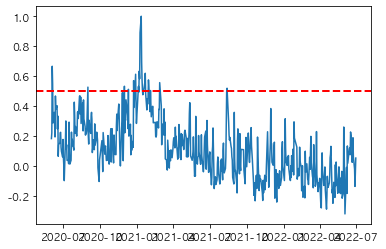

In [57]:
import matplotlib.pyplot as plt

plt.plot(df['날짜'], df['거래량'])
plt.axhline(0.5, color='red', linestyle='--', linewidth=2)